# Detection

In [6]:
import torch
import cv2

In [2]:
# Load our detection model
model = torch.hub.load("ultralytics/yolov5","custom","Pan_Card_Yolo.pt")

Using cache found in C:\Users\bhush/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-1-2 torch 1.10.1 CPU

Fusing layers... 
Model Summary: 308 layers, 21053802 parameters, 0 gradients
Adding AutoShape... 


In [3]:
img = "testbpan.jpg"

In [4]:
img

'testbpan.jpg'

In [5]:
type(img)

str

In [6]:
# Reading an image from disk
img = cv2.imread("testbpan.jpg")

In [7]:
img

array([[[253, 255, 255],
        [253, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 242],
        [255, 254, 253],
        [246, 247, 255]],

       [[253, 255, 255],
        [253, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 235],
        [255, 255, 249],
        [248, 248, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [237, 222, 189],
        [255, 251, 233],
        [255, 255, 249]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [252, 254, 255],
        [252, 254, 255],
        [252, 254, 255]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [252, 254, 255],
        [252, 254, 255],
        [252, 254, 255]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 255, 255],
        [253, 255, 255],
        [253, 255, 255]]

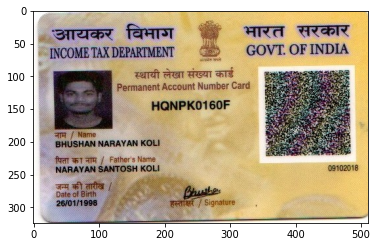

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.imshow(img)
# Automatically reads in BGR format

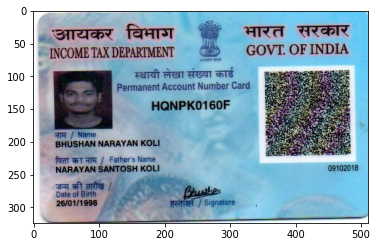

In [9]:
# This is used for reversing image colors
plt.imshow(img[:,:,::-1])

In [2]:
cv2.imshow("temp",img)
cv2.waitKey(0)

In [3]:
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

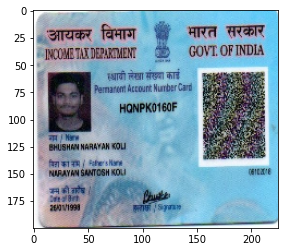

In [12]:
# To resize an image
resized = cv2.resize(img,
                    (225,200)) # width,height
# Show image
# cv2.imshow("temp",resized)
# cv2.waitKey(0)
plt.imshow(resized[:,:,::-1])


In [ ]:
rgb_image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2.imshow("temp",rgb_image)
cv2.waitKey(0)

In [ ]:
a = cv2.imread("testbpan.jpg",cv2.IMREAD_GRAYSCALE)
cv2.imshow("temp",a)
cv2.waitKey(0)

In [ ]:
import numpy as np
a = np.array([1,2,3,4,5,6])
a[2:4]

In [ ]:
# img[h:w:c]
h,w,c = img.shape
print(f"Height : {h}, Width : {w}, Channels : {c}")

In [ ]:
b = np.array([[1,2,3,4,5,6],
             [1,2,3,4,5,6],
             [1,2,3,4,5,6],
             [1,2,3,4,5,6],
             [1,2,3,4,5,6]])
b[:,:3]

In [13]:
results = model(img)

C:\Users\bhush\anaconda3\envs\pytorch\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [14]:
results.print()

image 1/1: 324x511 1 Name, 1 Fathers Name, 1 DOB, 1 Pan Number, 1 Photo
Speed: 3.0ms pre-process, 294.7ms inference, 2.0ms NMS per image at shape (1, 3, 416, 640)


In [15]:
results.show()

In [16]:
import pandas as pd
df = results.pandas().xyxy[0]

In [17]:
df

,xmin,ymin,xmax,ymax,confidence,class,name
0,27.392591,193.767715,197.906265,211.897079,0.888105,0,Name
1,173.482239,132.098145,302.876587,159.032928,0.862454,3,Pan Number
2,29.935965,89.658585,121.739571,184.558716,0.861959,4,Photo
3,30.009270,285.760040,101.327820,302.460480,0.841126,2,DOB
4,26.741241,233.375519,197.483551,250.450989,0.828859,1,Fathers Name


In [18]:
# ymin:ymax, Xmin:xmax
name = img[193:211,27:197]
pan_number = img[132:159,173:302]
photo = img[89:184,29:121]
dob = img[285:302,30:101]
father_name = img[233:250,26:197]

#Recognition


In [19]:
# Various OCR libraries
# Tesseract -- google
# Keras OCR
# MMOCR
# EasyOCR

!pip install easyocr


In [22]:
import easyocr
reader = easyocr.Reader(["en"])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.



Progress: |--------------------------------------------------| 0.0% Complete

Progress: |--------------------------------------------------| 0.0% Complete

Progress: |--------------------------------------------------| 0.0% Complete

Progress: |--------------------------------------------------| 0.0% Complete

Progress: |--------------------------------------------------| 0.0% Complete

Progress: |--------------------------------------------------| 0.1% Complete

Progress: |--------------------------------------------------| 0.1% Complete

Progress: |--------------------------------------------------| 0.1% Complete

Progress: |--------------------------------------------------| 0.1% Complete

Progress: |--------------------------------------------------| 0.1% Complete

Progress: |--------------------------------------------------| 0.1% Complete

Progress: |--------------------------------------------------| 0.1% Complete

Progress: |--------------------------------------------------| 


Progress: |█-------------------------------------------------| 2.8% Complete

Progress: |█-------------------------------------------------| 2.8% Complete

Progress: |█-------------------------------------------------| 2.8% Complete

Progress: |█-------------------------------------------------| 2.8% Complete

Progress: |█-------------------------------------------------| 2.8% Complete

Progress: |█-------------------------------------------------| 2.8% Complete

Progress: |█-------------------------------------------------| 2.9% Complete

Progress: |█-------------------------------------------------| 2.9% Complete

Progress: |█-------------------------------------------------| 2.9% Complete

Progress: |█-------------------------------------------------| 2.9% Complete

Progress: |█-------------------------------------------------| 2.9% Complete

Progress: |█-------------------------------------------------| 2.9% Complete

Progress: |█-------------------------------------------------| 


Progress: |██------------------------------------------------| 4.6% Complete

Progress: |██------------------------------------------------| 4.6% Complete

Progress: |██------------------------------------------------| 4.6% Complete

Progress: |██------------------------------------------------| 4.6% Complete

Progress: |██------------------------------------------------| 4.6% Complete

Progress: |██------------------------------------------------| 4.6% Complete

Progress: |██------------------------------------------------| 4.7% Complete

Progress: |██------------------------------------------------| 4.7% Complete

Progress: |██------------------------------------------------| 4.7% Complete

Progress: |██------------------------------------------------| 4.7% Complete

Progress: |██------------------------------------------------| 4.7% Complete

Progress: |██------------------------------------------------| 4.7% Complete

Progress: |██------------------------------------------------| 

Download complete


Download complete.


['26/01/1998']

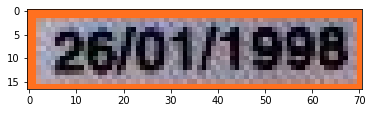

In [25]:
plt.imshow(dob);
reader.readtext(dob,detail=0)

['NARAYAN SANTOSH KOLI']

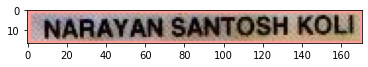

In [31]:
plt.imshow(father_name);
reader.readtext(father_name,detail=0)

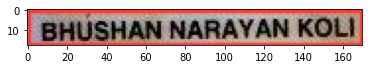

In [38]:
plt.imshow(name)


In [46]:
name_json = reader.readtext(name)

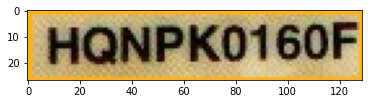

In [41]:
plt.imshow(pan_number)

In [1]:
reader.readtext(pan_number,detail=0)

In [ ]:
# crate class named
# class PAN_INFORMATION_EXTRACTOR():
#     constructor(model_path)
# methods: load_model( -- pancard yolo load karaycha)
#     detect(img) = detect karun dataframe madhe convert karaycha return karnar
#     crop_rois = region of interest (crop kelele variables using arr img[])
#     run_ocr() = ocr run karaycha crops var
#     extract() = detect , crop,ocr_run krun json{} return karaycha